# Homework 1 
### Kate Lassiter

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from random import seed
from random import randint
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import time
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

### Problem 1 - Linear Separability 10 points <br/>
##### Consider a dataset with two features x1 and x2 in which the points (−1,−1),(1,1),(−3,−3),(4,4) belong to one class and (−1,1),(1,−1),(−5,2),(4,−8) belong to the other.
##### 1. Is this dataset linearly separable ? Can a linear classifier be trained using features x1 and x2 to classify this data set ? You can plot the dataset points and argue. (2)

In [2]:
points={'x1':[-1,1,-3,4,-1,1,-5,4],'x2':[-1,1,-3,4,1,-1,2,-8],\
        'class':['A','A','A','A','B','B','B','B']}
data = pd.DataFrame(data=points)

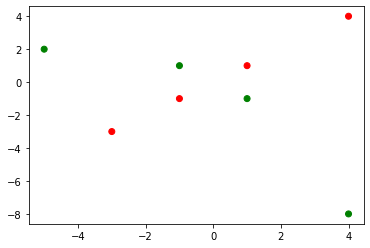

In [3]:
fig, ax = plt.subplots()
colors = {'A':'red', 'B':'green'}
ax.scatter(data['x1'], data['x2'], c=data['class'].map(colors))

Because you can not seperate the two classes with a straight, linear line, it is clear that the dataset is not linearly seperable.

#### 2. Can you define a new 1-dimensional representation z in terms of x1 and x2 such that the dataset is linearly separable in terms of 1-dimensional representation corresponding to z ? (4)


In [4]:
new=data.copy()
new['z1']=data['x1']*data['x2']
new['y']=[0]*8

fig, ax = plt.subplots()
colors = {'A':'red', 'B':'green'}
ax.scatter(new['z1'],new['y'], c=new['class'].map(colors))
plt.show()

By mapping x1 and x2 to the new representation z = x1*x2, the data now becomes linearly seperable.

#### 3. What does the separating hyperplane looks like ? 

A straight line at x=0

#### 4. Explain the importance of nonlinear transformations in classification problems.
 
Nonlinear tranformations are very important for classification problems because the decision boundary isn't always linear. If it is not, than a clear seperation between classes is impossible unless we transform the inputs to capture these nonlinear dynamics. If the decision boundary is circular, a linear boundary will never fully seperate the two classes, whereas if we transformed the inputs to capture the higher order polynomial boundary, it could.

### Problem 2 - Bias Variance Tradeoff, Regularization 40 points
#### 1. Derive the bias-variance decomposition for a regression problem, i.e., prove that the expected mean squared error of a regression problem can be written as E[MSE] = Bias2 + V ariance + Noise

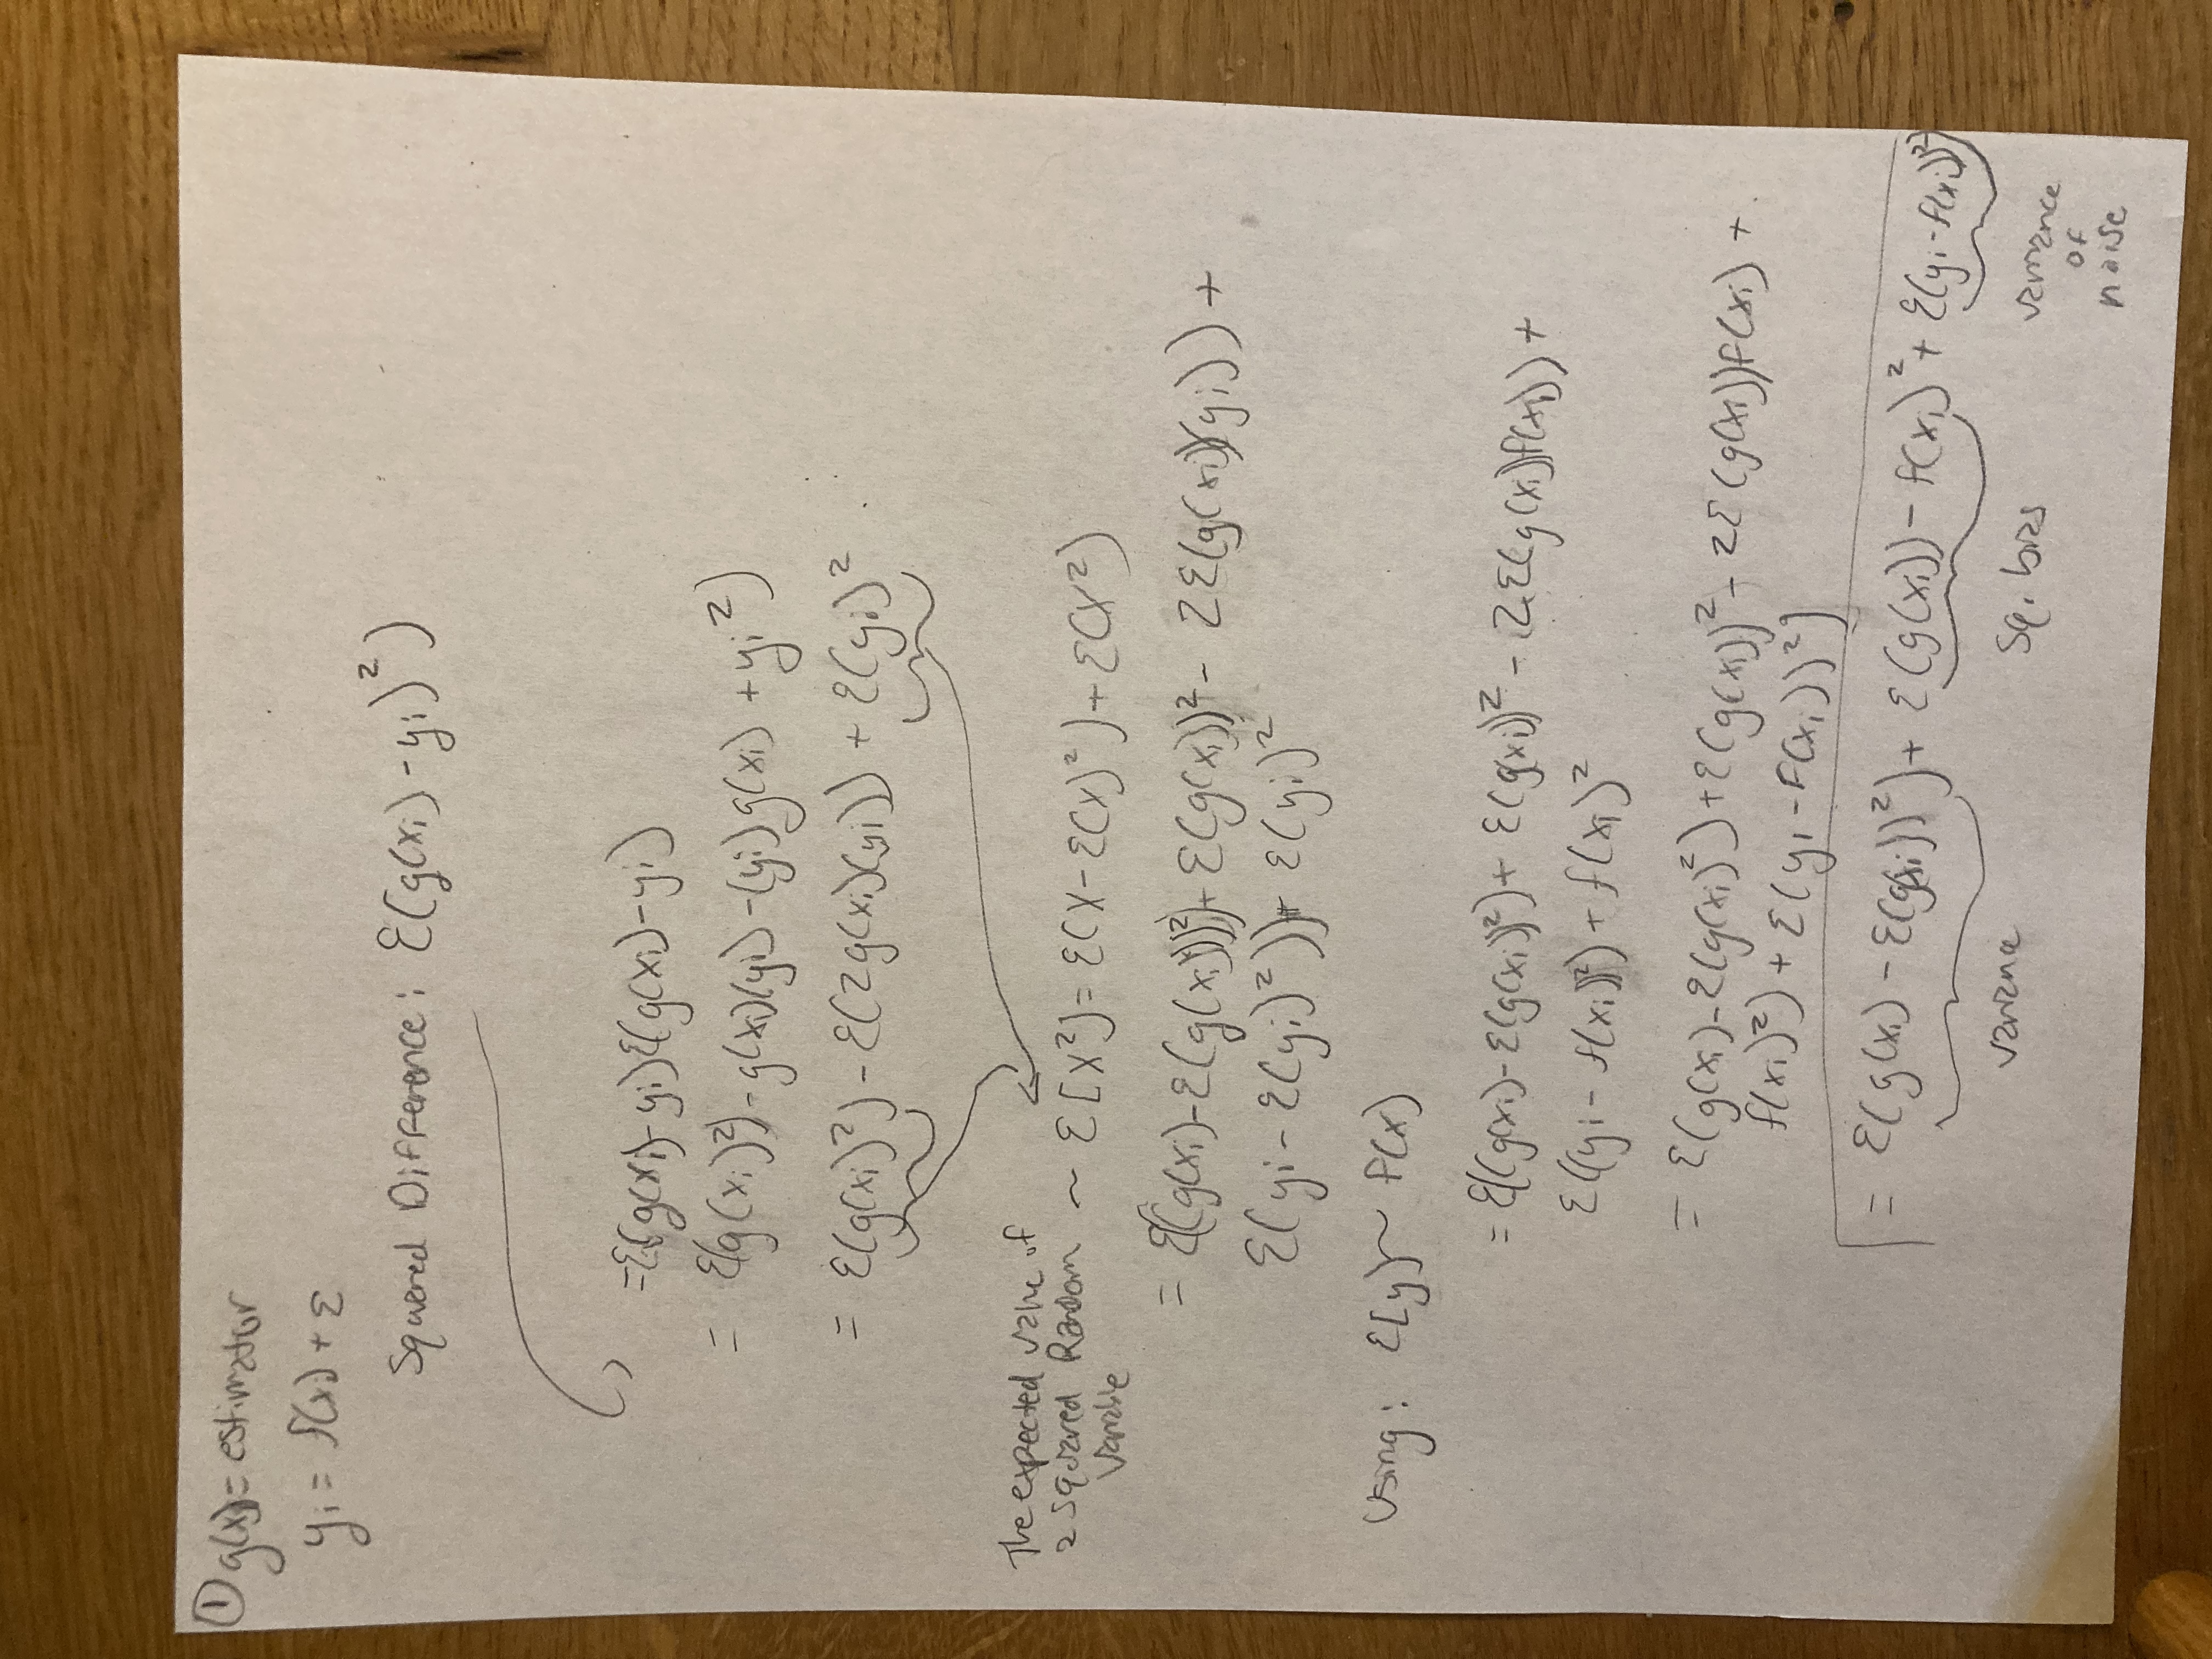

See attached pdf

#### 2. Consider the case when y(x) = x + sin(1.5x) + N(0,0.3), where N(0,0.3) is normal distribution with mean 0 and variance 0.3. Here f(x) = x + sin(1.5x) and ε = N(0,0.3). Create a dataset of size 20 points by randomly generating samples from y. Display the dataset and f(x). Use scatter plot for y and smooth line plot for f(x). (5)

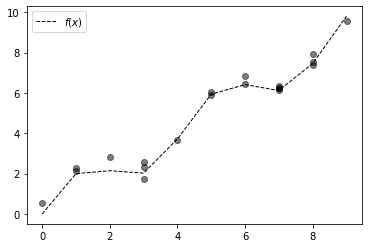

In [5]:
# generate some integers
np.random.seed(0) # seed random number generator
X=list(np.sort([np.random.randint(0, 10) for x in range(20)]))

#create the points from an equation
def my_equation(x1,mu,sigma,add_noise=True):
    if add_noise == True:
        return(x1+np.sin(1.5*x1)+np.random.normal(mu, sigma, 1))
    else:return(x1+np.sin(1.5*x1))
np.random.seed(0)# seed random number generator
y=list(map(lambda x: my_equation(x,0,0.3),X))
y_true=list(map(lambda x: my_equation(x,0,0.3,add_noise=False),X))

fig, ax = plt.subplots()
X_formula=np.arange(0,10)
y_formula=list(map(lambda x: my_equation(x,0,0.3,add_noise=False),X_formula))
plt.plot(X_formula, y_formula,color="black",linestyle ='dashed',
         linewidth = 1,label="$f(x)$" )
plt.scatter(X, y,  c="black", alpha=0.5)
plt.legend()
plt.show()

#### 3. Use weighted sum of polynomials as an estimator function for f(x), in particular, let the form of estimator function be: gn(x) = β0 + β1x + β2x2 + ..... + βnxn Consider three candidate estimators, g1,g3, and g10. Estimate the coefficients of each of the three estimators using the sampled dataset and plot y(x),f(x),g1(x),g3(x),g10(x). Which estimator is un-derfitting ? Which one is overfitting ? (10)

In [6]:
new_x=np.sort(np.array(X).reshape(-1,1),axis=0)
poly_three_features=PolynomialFeatures(degree=3,include_bias=False)
poly_ten_features=PolynomialFeatures(degree=10,include_bias=False)
X_poly_three=poly_three_features.fit_transform(new_x)
X_poly_ten=poly_ten_features.fit_transform(new_x)

In [7]:
lin_reg=LinearRegression()
simple_reg=lin_reg.fit(new_x,y)
lin_reg=LinearRegression()
three_reg=lin_reg.fit(X_poly_three,y)
lin_reg=LinearRegression()
ten_reg=lin_reg.fit(X_poly_ten,y)

In [8]:
simple_pred=simple_reg.predict(new_x)
three_pred=three_reg.predict(X_poly_three)
ten_pred=ten_reg.predict(X_poly_ten)

In [9]:
fig, ax = plt.subplots()
plt.plot(X_formula, y_formula,color="black",linestyle ='dashed',
         linewidth = 1,label="$f(x)$")
plt.plot(new_x, simple_pred,  c="darkgreen", alpha=0.5,label="Degree 1")
plt.plot(new_x, three_pred,  c="red", alpha=0.5,label="Degree 3")
plt.plot(new_x, ten_pred,  c="blue",label="Degree 10",linewidth = 0.5)
plt.scatter(new_x, y,  c="black", alpha=0.5)
plt.legend()
plt.show()

It is clear that the first and 3rd degree polynomials are underfitting to the points because they do not capture any of the variance, they remain nearly a straight line. On the other hand the 10th degree polynomial is clearly overfitting to the data and capturing every bit of noise in the data set, nearly perfectly fitting. Whereas the first and third degree polynomials contain clear bias from the correct model, the higher degree polynomial's great performance would not generalize to unseen data. The 1st and 3rd degree polynomials lack the flexible needed to truly model the data patterns, while the 10th degree polynomial is so flexivle it is picking up flase patterns.

#### 4. Generate 100 datasets (each of size 50) by randomly sampling from y. Partition each dataset into training and test set (80/20 split). Next fit the estimators of varying complexity, i.e., g1,g2,....g15 using the training set for each dataset. Then calculate and display the squared bias, variance, and error on testing set for each of the estimators showing the tradeoff between bias and variance with model complexity. Can you identify the best model ? (10)

In [10]:
np.random.seed(124)
X = np.linspace(-1, 1, 50)
X = np.random.permutation(X)
yhat_train = defaultdict(list)
y_hat_test = defaultdict(list)
error_train = defaultdict(list)
error_test = defaultdict(list)
X_train = X[:40]
X_test = X[40:]
degrees = range(1, 16)

def my_equation(x):
    return x+np.sin(1.5*x)

def error(pred, actual):
    return (pred - actual) ** 2

def squared_bias(y_hat_test):
    avg_pred = np.array(y_hat_test).mean(0) 
    return np.mean((avg_pred - my_equation(X_test)) ** 2)

def var_est(y_hat_test):
    avg_pred = np.array(y_hat_test).mean(0)
    return np.mean((np.array(y_hat_test) - avg_pred) ** 2)

for dataset in range(100):
    y_train = my_equation(X_train) + (0.3 * np.random.randn(40))
    y_test = my_equation(X_test) + (0.3 * np.random.randn(10))
    for degree in degrees:
        coeffs = np.polyfit(X_train, y_train, degree)
        pred_train = np.polyval(coeffs, X_train)
        yhat_train[degree].append(pred_train)
        pred_test = np.polyval(coeffs, X_test)
        y_hat_test[degree].append(pred_test)
        error_train[degree].append(np.mean(error(pred_train, y_train)))
        error_test[degree].append(np.mean(error(pred_test, y_test)))

errors_train_list = []
errors_test_list = []
sq_biases = []
vars_list = []
for degree in degrees:
    errors_train_list.append(np.mean(error_train[degree]))
    errors_test_list.append(np.mean(error_test[degree]))
    sq_biases.append(squared_bias(y_hat_test[degree]))
    vars_list.append(var_est(y_hat_test[degree]))

fig, axs = plt.subplots(figsize=(14, 10))
plt.plot(degrees, sq_biases, color='blue', label='sqaured bias')
plt.plot(degrees, vars_list, color='green', label='variance')
plt.plot(degrees, errors_test_list, label='Testing Set Error', color='red')
plt.xlabel('Polynomial Degree')
plt.ylim([0, .5]);
plt.title('Bias Variance Tradeoff and Testing Error')
plt.legend()
plt.show()

The best model is that at degree 3 because this is where testing error is at a minimum. We've traded a biased model for one that is unbiased, and variance is not too high.

#### 4. One way to increase model bias is by using regularization. Lets take the order 10 polynomial and apply L2 regularization. Compare the bias, variance, and MSE of the regularized model with the unregularized order 10 polynomial model ? Does the regularized model have a higher or lower bias ? What about MSE ? Explain. (10)

In [11]:
np.random.seed(124)
degree=10
for dataset in range(100):
    y_train = my_equation(X_train) + (0.3 * np.random.randn(40))
    y_test = my_equation(X_test) + (0.3 * np.random.randn(10))
    poly_features=PolynomialFeatures(degree=10,include_bias=False)
    X_poly=poly_features.fit_transform(X_train.reshape(-1,1))
    lin_reg = Ridge()
    lin_reg.fit(X_poly, y_train)
    pred_train =lin_reg.predict(X_poly)
    yhat_train[degree].append(pred_train)
    X_test_poly=poly_features.transform(X_test.reshape(-1,1))
    pred_test = lin_reg.predict(X_test_poly)
    y_hat_test[degree].append(pred_test)
    error_train[degree].append(np.mean(error(pred_train, y_train)))
    error_test[degree].append(np.mean(error(pred_test, y_test)))
    
error_test_degree_10=np.mean(error_test[degree])
sq_biase_10=squared_bias(y_hat_test[degree])
var_10=var_est(y_hat_test[degree])

print("Unregularized")
print("error:",errors_test_list[9],"bias:",sq_biases[9],"variance:",vars_list[9])
print("Regularized")
print("error:",error_test_degree_10,"bias:",sq_biase_10,"variance:",var_10)


Unregularized
error: 1.3158396973923427 bias: 0.0010657521212900656 variance: 1.197859618186966
Regularized
error: 0.7305444386988689 bias: 0.007856985198329369 variance: 0.6169692803770372


In order to reduce the variance, L2 regularization was applied to the polynomial model. This was successful, where variance reduced significantly and bias increased. This is because regularization helps to reduce the complexity of the model, reducing variance, so the predictions were similar across the 100 datatsets. However, the model isn't as complex so it is unable to fully capture the true relationship of X and y, adding bias. The testing error is lower for the regulairzed model, because it is now no longer fitting to all the noise and is better able to generalize the pattern it's learned on new data.

## Problem 3 - OpenML, Algorithmic Performance Scaling 25 points

Dataset 1: Blood Transfusion Service Center Data Set

** Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan.

"To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database."

In [12]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('/Users/katelassiter/Downloads/php0iVrYT.arff')
df = pd.DataFrame(data[0])
df['Class']=df['Class'].str.decode('utf-8') 
df['Class']=df['Class'].astype(int)
df['Class']=df['Class'].replace(1,0)
df['Class']=df['Class'].replace(2,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    float64
 1   V2      748 non-null    float64
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   Class   748 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 KB


#### 1. Summarize the attributes of each dataset: number of features, number of instances, number of classes, number of numerical features, number of categorical features. (5)

Variable Descriptions:<br> 
Number of features- 4<br> 
Number of instances- 728<br> 
Number of classes- 2<br> 
Number of numerical features- 4<br> 
Number of categorical features- 0<br> 

V1: The number of months since the last time a pateint donated blood<br> 
V2: Number of times a patient has donated in the past<br> 
V3: Amount of blood the patient donated (in CC's)<br> 
V4: Number of months since the first time the pateint donated <br> 
Class: Binary indicator of whether the patient donated blood in March 2007

#### 2. For each dataset, select 80% of data as training set and remaining 20% as test set. Generate 10 different subsets of the training set by randomly subsampling 10%,20%,...,100% of the training set. Use each of these subsets to train two different classifiers: Random forest and Gradient boosting. When training a classifier also measure the wall clock time to train. After each training, evaluate the accuracy of trained models on the test set. Report model accuracy and training time for each of the 10 subsets of the training set. Generate learning curve for each classifier. A learning curve shows how the accuracy changes with increasing size of training data. Also create a curve showing the training time of classifiers with increasing size of training data. So, for each dataset you will have two figures: First figure showing learning curves (x-axis being training data size and y-axis accuracy) for the two classifiers and second Figure showing training time for the two classifiers as a function of training data size.

In [13]:
#shuffle dataset, take test/train
df = df.sample(frac=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        df.drop(['Class'],axis=1), df['Class'], test_size=0.2, random_state=42)

In [14]:
fractions=np.arange(0.1,1.1,0.1)
accuracies_forest_d1=[]
accuracies_grad_d1=[]
times_forest_d1=[]
times_grad_d1=[]
np.random.seed(31415)
for x in fractions:
    X_sample = X_train.sample(frac=x)
    y_sample = y_train[X_sample.index]
    clf = RandomForestClassifier(random_state=0)
    tic = time.perf_counter()
    clf.fit(X_sample, y_sample)
    toc = time.perf_counter()
    times_forest_d1=times_forest_d1+[(toc - tic)*1000]
    accuracies_forest_d1=accuracies_forest_d1+[clf.score(X_test, y_test)]#clf.predict(X_test))
    clf = GradientBoostingClassifier(random_state=0)
    tic = time.perf_counter()
    clf.fit(X_sample, y_sample)
    toc = time.perf_counter()
    times_grad_d1=times_grad_d1+[(toc - tic)*1000]
    accuracies_grad_d1=accuracies_grad_d1+[clf.score(X_test, y_test)]

Dataset 2: Vehicle Silhouettes Data Set<br> 
"Purpose: to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles."

In [15]:
df2 = arff.loadarff('/Users/katelassiter/Downloads/dataset_54_vehicle.arff')
df2=pd.DataFrame(df2[0])
df2['Class']=df2['Class'].str.decode('utf-8')
df2.head()
df2['Class']=df2['Class'].replace("van",0)
df2['Class']=df2['Class'].replace("saab",1)
df2['Class']=df2['Class'].replace("bus",2)
df2['Class']=df2['Class'].replace("opel",3)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COMPACTNESS                846 non-null    float64
 1   CIRCULARITY                846 non-null    float64
 2   DISTANCE_CIRCULARITY       846 non-null    float64
 3   RADIUS_RATIO               846 non-null    float64
 4   PR.AXIS_ASPECT_RATIO       846 non-null    float64
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    float64
 6   SCATTER_RATIO              846 non-null    float64
 7   ELONGATEDNESS              846 non-null    float64
 8   PR.AXIS_RECTANGULARITY     846 non-null    float64
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    float64
 10  SCALED_VARIANCE_MAJOR      846 non-null    float64
 11  SCALED_VARIANCE_MINOR      846 non-null    float64
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    float64
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    float64

#### 1. Summarize the attributes of each dataset: number of features, number of instances, number of classes, number of numerical features, number of categorical features. (5)

Variable Descriptions:<br> 
Number of features- 18<br> 
Number of instances- 846<br> 
Number of classes- 4<br> 
Number of numerical features- 18<br> 
Number of categorical features- 1 (converted to numeric)<br> 

There are 18 attributes describing different features of a vehicle:<br> 
COMPACTNESS - (average perim)^2/area<br> 
CIRCULARITY- (average radius)^2/area<br> 
DISTANCE CIRCULARITY    area/(av.distance from border)^2<br> 
RADIUS RATIO    (max.rad-min.rad)/av.radius<br> 
PR.AXIS ASPECT RATIO    (minor axis)/(major axis)<br> 
MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)<br> 
SCATTER RATIO   (inertia about minor axis)/(inertia about major axis)<br> 
ELONGATEDNESS           area/(shrink width)^2<br> 
PR.AXIS RECTANGULARITY  area/(pr.axis length*pr.axis width)<br> 
MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)<br> 
SCALED VARIANCE         (2nd order moment about minor axis)/area<br> 
ALONG MAJOR AXIS
SCALED VARIANCE         (2nd order moment about major axis)/area<br> 
ALONG MINOR AXIS 
SCALED RADIUS OF GYRATION       (mavar+mivar)/area<br> 
SKEWNESS ABOUT  (3rd order moment about major axis)/sigma_min^3<br> 
MAJOR AXIS
SKEWNESS ABOUT  (3rd order moment about minor axis)/sigma_maj^3<br> 
MINOR AXIS
KURTOSIS ABOUT  (4th order moment about major axis)/sigma_min^4<br> 
MINOR AXIS  
KURTOSIS ABOUT  (4th order moment about minor axis)/sigma_maj^4<br> 
MAJOR AXIS
HOLLOWS RATIO   (area of hollows)/(area of bounding polygon)

#### 2. For each dataset, select 80% of data as training set and remaining 20% as test set. Generate 10 different subsets of the training set by randomly subsampling 10%,20%,...,100% of the training set. Use each of these subsets to train two different classifiers: Random forest and Gradient boosting. When training a classifier also measure the wall clock time to train. After each training, evaluate the accuracy of trained models on the test set. Report model accuracy and training time for each of the 10 subsets of the training set. Generate learning curve for each classifier. A learning curve shows how the accuracy changes with increasing size of training data. Also create a curve showing the training time of classifiers with increasing size of training data. So, for each dataset you will have two figures: First figure showing learning curves (x-axis being training data size and y-axis accuracy) for the two classifiers and second Figure showing training time for the two classifiers as a function of training data size.

In [16]:
#shuffle dataset, take test/train
df2 = df2.sample(frac=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        df2.drop(['Class'],axis=1), df2['Class'], test_size=0.2, random_state=42)

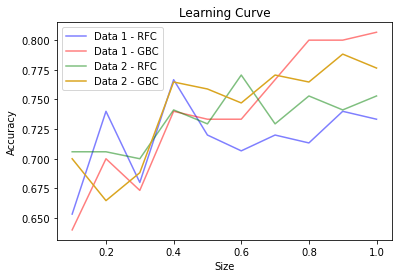

In [17]:
accuracies_forest_d2=[]
accuracies_grad_d2=[]
times_forest_d2=[]
times_grad_d2=[]
np.random.seed(31415)
for x in fractions:
    X_sample = X_train.sample(frac=x)
    y_sample = y_train[X_sample.index]
    clf = RandomForestClassifier(random_state=0)
    tic = time.perf_counter()
    clf.fit(X_sample, y_sample)
    toc = time.perf_counter()
    times_forest_d2=times_forest_d2+[(toc - tic)*1000]
    accuracies_forest_d2=accuracies_forest_d2+[clf.score(X_test, y_test)]#clf.predict(X_test))
    clf = GradientBoostingClassifier(random_state=0)
    tic = time.perf_counter()
    clf.fit(X_sample, y_sample)
    toc = time.perf_counter()
    times_grad_d2=times_grad_d2+[(toc - tic)*1000]
    accuracies_grad_d2=accuracies_grad_d2+[clf.score(X_test, y_test)]
    
fig, ax = plt.subplots()
plt.plot( fractions ,accuracies_forest_d1,  c="blue", label='Data 1 - RFC',alpha=0.5)
plt.plot( fractions,accuracies_grad_d1,  c="red", label='Data 1 - GBC',alpha=0.5)
plt.plot( fractions,accuracies_forest_d2,  c="green",label='Data 2 - RFC', alpha=0.5)
plt.plot( fractions,accuracies_grad_d2,  c="goldenrod",label='Data 2 - GBC')
plt.legend()
plt.title('Learning Curve')
plt.xlabel("Size")
plt.ylabel("Accuracy")
plt.show()

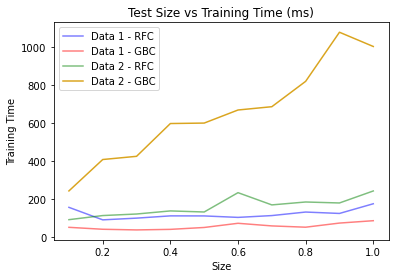

In [18]:
fig, ax = plt.subplots()
plt.plot( fractions ,times_forest_d1,  c="blue", label='Data 1 - RFC',alpha=0.5)
plt.plot( fractions,times_grad_d1,  c="red", label='Data 1 - GBC',alpha=0.5)
plt.plot( fractions,times_forest_d2,  c="green",label='Data 2 - RFC', alpha=0.5)
plt.plot( fractions,times_grad_d2,  c="goldenrod",label='Data 2 - GBC')
plt.legend()
plt.title('Test Size vs Training Time (ms)')
plt.xlabel("Size")
plt.ylabel("Training Time")
plt.show()

In terms of accuracy for dataset 1, the gradient boosting classifer performs much better than the random forest once test size fraction increases past 30%. It is likewise much faster. For dataset 2, the gradient boosted model has higher accuracy for most of the training set sizes, but not all. At times the random forest performs better, especially with small sample size. However, the gradient boosted model is much slower on this multiclass classification problem than the random forest, likely due to the large number of features. Neither of these datsets were particularly large, but if they were larger, the training time would have increased much more as we sampled larger percentages of the data. Overall, the accuracy on both datasets increased as more training instances were fed to the model, except for the random forest classifer on dataset 1.

### Problem 4 - Precision, Recall, ROC 25 points

#### 1. Does true negative matter for both ROC and PR curve ? Argue why each point on ROC curve corresponds to a unique point on PR curve ? (5)

True negatives can only be observed in ROC curves. They appear in the denominator of the false positive rate plotted on the x axis which compares false positives to false positives and true negatives. Precision recall curves on the other hand plot precision on the y axis which considers true positives to true positives plus false positives. Both curves consider the true positive rate which is the same as recall. If there are a much larger number of negative examples than the number of positive examples, this will cause the false positive rate to remain small even if there is a large change in the number of true false positives. Because precision focuses on true positives to true positives plus false positives and doesn't consider true negatives, this makes them the optimal performance measure for this type of problem where there are many true negatives and true negatives are not the model's focus.

There is a strong relationship between ROC curves and PR curves to the extent that the curves actually have the exact same confusion matrices, for each point in the ROC curve there exists one unique confusion matrix that represents all possible outcomes of a particular classification: true positive, false positive, false negative and true negative. Just because true negatives don't occur in the PR curve doesn't change this. Because the three other entries in the four item confusion matrix are the same and there are a fixed number of samples, that means there can only be one possible value in the true negative place. If all the other items in the matrix are equal to 25 and just the true negative is missing, and you know the number of items to be classified was 100, that clearly means that the last item, the true negative, has to be 25 because 25+25+25+x = 100. However it must be noted that if recall is equal to zero a unique confusion matrix cannot be discovered. Because of this fact, we know that there exists this one-to-one relation of confusion matrices to points in the PR space, and by extension the same points in the PR space to the ROC space as it is all explaining the same confusion matrix. This allows easy translation between the two spaces.

#### 2. Select one OpenML dataset with 2 output classes. Use two binary classifiers (Adaboost and Logistic regression) and create ROC and PR curves for each of them. You will have two figures: one containing two ROC and other containing two PR curves. Show the point where an all positive classifier lies in the ROC and PR curves. An all positive classifier classifies all the samples as positive. (10)

Phishing Websites Data Set <br/>
"One of the challenges faced by our research was the unavailability of reliable training datasets. In fact this challenge faces any researcher in the field. However, although plenty of articles about predicting phishing websites have been disseminated these days, no reliable training dataset has been published publically, may be because there is no agreement in literature on the definitive features that characterize phishing webpages, hence it is difficult to shape a dataset that covers all possible features. In this dataset, we shed light on the important features that have proved to be sound and effective in predicting phishing websites. In addition, we propose some new features."
https://www.openml.org/search?type=data&status=active&sort=nr_of_downloads&qualities.NumberOfClasses=gte_2&id=4534

In [19]:
df3 = arff.loadarff('/Users/katelassiter/Downloads/phpV5QYya.arff')
df3=pd.DataFrame(df3[0])
df3=df3.apply(lambda x: x.str.decode('utf8'))
df3['Result']=df3.Result.astype(int)

In [20]:
df3 = df3.sample(frac=1)
X_train, X_test, y_train, y_test = train_test_split(df3.drop(['Result'],axis=1), np.array(df3['Result']), 
                                                    test_size=0.2, random_state=42)

In [21]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
y_predition_proba_log = log_clf.predict_proba(X_test)
y_predition_log = log_clf.predict(X_test)
fals_pos_log, true_pos_log, thresholds_log = metrics.roc_curve(y_test, y_predition_proba_log[:,1].reshape(-1,1), pos_label=1, drop_intermediate=False)
precision_log, recall_log, thresholds_log = precision_recall_curve(y_test, y_predition_proba_log[:,1].reshape(-1,1), pos_label=1)

In [22]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_prediction_proba_ada = ada_clf.predict_proba(X_test)
y_prediction_ada = ada_clf.predict(X_test)
fals_pos_ada, true_pos_ada, thresholds_ada = metrics.roc_curve(y_test, y_prediction_proba_ada[:,1].reshape(-1,1), pos_label=1)
precision_ada, recall_ada, thresholds_ada = precision_recall_curve(y_test, y_prediction_proba_ada[:,1].reshape(-1,1), pos_label=1)

In [23]:
#all psotiive calssifier
fals_pos_allpos, true_pos_allpos, thresholds_allpos = metrics.roc_curve(y_test, y_test**2, pos_label=1, drop_intermediate=False)
precision_allpos, recall_allpos, thresholds_allpos = precision_recall_curve(y_test, y_test**2, pos_label=1)

In [24]:
fig, ax = plt.subplots()
plt.plot(fals_pos_log, true_pos_log, label='Logistic\nRegression',c="red")
plt.plot(fals_pos_ada, true_pos_ada, label='AdaBoost',c="blue")
plt.plot(fals_pos_allpos, true_pos_allpos, label='All Positive Classifier',c="green",linestyle ='dashed')

plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

In [25]:
fig, ax = plt.subplots()
plt.plot(recall_log, precision_log, label='Logistic\nRegression',c="red")
plt.plot(recall_ada, precision_ada, label='AdaBoost',c="blue")
plt.plot(recall_allpos,precision_allpos, label='All Positive Classifier',c="green",linestyle ='dashed')
plt.legend()
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()

#### 3. NIPS paper defined PR Gain curve. Calculate AUROC (Area under ROC), AUPR (Area under PR), and AUPRG (Area under PRG) for two classifiers and compare. Do you agree with the conclusion of NIPS paper that practitioners should use PR gain curves rather than PR curves. (10)

In [26]:
def gain_curve_calc(value):
    return (value - np.pi)/((1-np.pi)*value)

In [27]:
auroc_log=metrics.roc_auc_score(y_test,y_predition_log)
auroc_ada=metrics.roc_auc_score(y_test,y_prediction_ada)

#changing last value to very small as you can not divide by zero
recall_ada[-1:]=0.0000001
recall_log[-1:]=0.0000001
recall_gain_log = gain_curve_calc(recall_log)
precision_gain_log = gain_curve_calc(precision_log)

recall_gain_ada =  gain_curve_calc(recall_ada)
precision_gain_ada = gain_curve_calc(precision_ada)

plt.plot(recall_gain_log, precision_gain_log, label='Logistic \nRegression')
plt.plot(recall_gain_ada, precision_gain_ada, label='AdaBoost')
plt.title('Precision Recall Gain Curve')
plt.xlabel('Recall Gain')
plt.ylabel('Precision Gain')
plt.grid()
plt.legend()
plt.ylim(0.9,1.6)

log_prg=metrics.auc(recall_gain_log, precision_gain_log)
ada_prg=metrics.auc(recall_gain_ada, precision_gain_ada)
    
print('Logistic Regression AUROC:', auroc_log)
print('AdaBoost AUROC:',auroc_ada)
print('Logistic Regression AUPRG:',log_prg)
print('Adaboost AUPRG:', ada_prg)

Logistic Regression AUROC: 0.9350208262601336
AdaBoost AUROC: 0.9355371353334273
Logistic Regression AUPRG: 14669420.660924481
Adaboost AUPRG: 14669420.628395807


While I have done the graphing incorrectly, the precision recall gain curve is certainly preferable because it allows for linear interpolation. Standard averages cannot be used because precision and recall exist as harmonic values, especially when dealing with limited positive instances, using precision recall gain allows for accurate averaging under the precision recall curves. The area under the precision recall gain curve makes for much easier calculation than the standard area under the precision recall curve because of this very property. It allows accurate interpretation to be an F-gain score rather than a standard Fb score, clearly showing performance at varying thresholds.